In [1]:
!pwd
!which python

/media/ebeyerle/seagate/frenkel/ellipsoid/GB/nvt/GB_3_5_2_1/anneal/notebooks
/home/ebeyerle/anaconda3/envs/hoomd/bin/python


In [2]:
#import hoomd
#import gsd.hoomd
import numpy as np
#import freud
#import rowan
import matplotlib.pyplot as plt
import subprocess
from scipy import spatial
from tqdm import tqdm
from scipy import optimize

In [3]:
def coordination(ftraj, boxl, r_cut = 3.0):
	N = ftraj.shape[1]
	C = np.zeros(ftraj.shape[0])
	for i in range(N):
		#if i % 10 == 0: print(i)
		for j in range(N):
			if i == j: pass
			tmp = ftraj[:,i,:] - ftraj[:,j,:]
			rij = np.linalg.norm(tmp, axis = 1)
			rij = rij - boxl * np.rint(2 * rij/boxl)
			C = C + (1 - (rij / r_cut)**6) / (1 - (rij / r_cut)**12)
	return C / N

def fit_power(x, a, b):
    return a*(np.abs(x)**b)

def linfit(x, a, b):
    return a * x + b

In [4]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [5]:
S_list = []
T_list = []
chi_list = []
colvar_list = []
PF_list = []
q4_list = []
q6_list = []
U_list = []
for T in [0.1, 0.25, 0.5, 0.8, 0.9, 1.0]:
    T_list.append(T)
    #if T == 0.8:
    tmp = np.load('../T_%s_rho_0.35/new_C_perp_colvar.npy' % T)[1000:]
    #else:
        #tmp = np.load('../T_%s_rho_0.35/calculated_colvar.npy' % T)
    S = tmp[:,0]
    S_list.append(S.mean())
    #colvar_list.append(S)
    #chi_list.append(S.var())
    #PF_list.append(tmp[:,1].mean())
    #q4_list.append(tmp[:,-2].mean())
    #q6_list.append(tmp[:,-1].mean())
    U_list.append(np.loadtxt('../T_%s_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
for T in [1.3, 1.4, 1.5, 1.6, 1.7]:
    S = np.load('../T_%.1f_rho_0.35/S.npy' % T)[1000:]
    S_list.append(S.mean())
    T_list.append(T)
    U_list.append(np.loadtxt('../T_%s_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
for T in [1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79]:
    S = np.load('../T_%.2f_rho_0.35/S.npy' % T)[1000:]
    S_list.append(S.mean())
    T_list.append(T)
    U_list.append(np.loadtxt('../T_%s_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
for T in np.arange(1.8, 2.5, 0.1):
    S = np.load('../T_%.1f_rho_0.35/S.npy' % T)[1000:]
    S_list.append(S.mean())
    T_list.append(T)
    U_list.append(np.loadtxt('../T_%.1f_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
U_list = np.array(U_list)

9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001


/tmp/ipykernel_1750876/653507063.py:26: RuntimeWarning: Mean of empty slice.
  S_list.append(S.mean())
/home/ebeyerle/anaconda3/envs/hoomd/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1750876/653507063.py:38: RuntimeWarning: Mean of empty slice.
  S_list.append(S.mean())


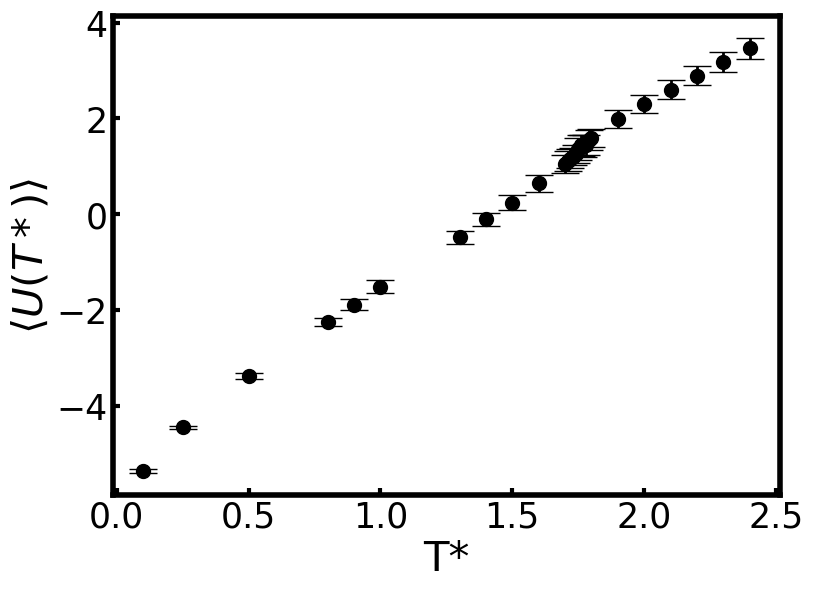

In [6]:
plt.errorbar(T_list, U_list.mean(1), yerr = U_list.std(1), marker = 'o', lw = 0,  c = 'k', markersize = 10, capthick = True,
            capsize = 10, elinewidth = 2)
plt.xlabel('T*')
plt.ylabel(r'$\langle U(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

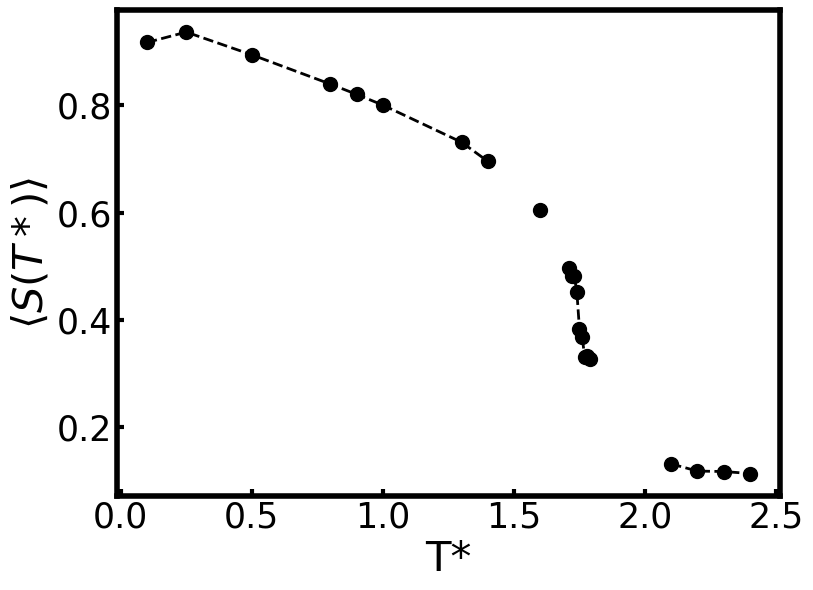

In [7]:
plt.plot(T_list, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

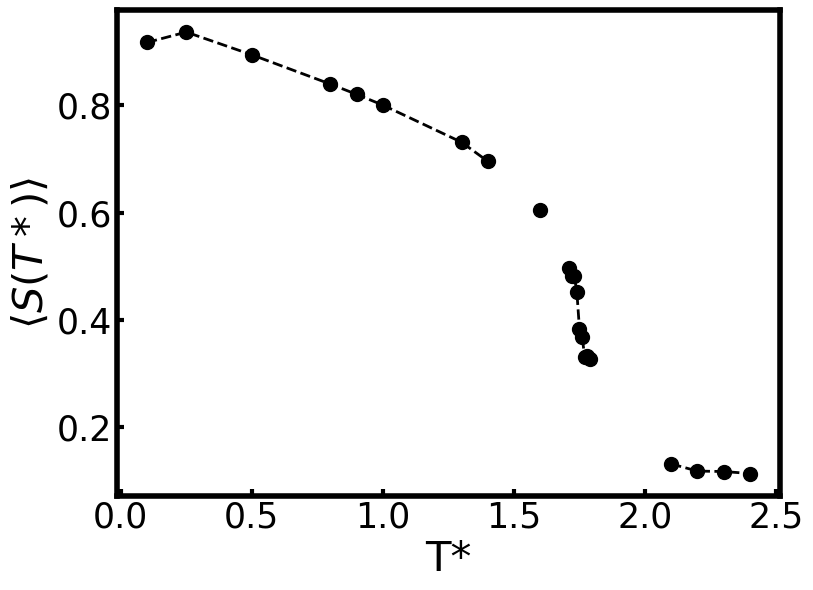

In [8]:
plt.plot(T_list, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [9]:
S_list = np.array(S_list)
T_list = np.array(T_list)
dT = T_list[1:] - T_list[:-1]

In [10]:
dSdT = np.gradient(S_list, T_list)

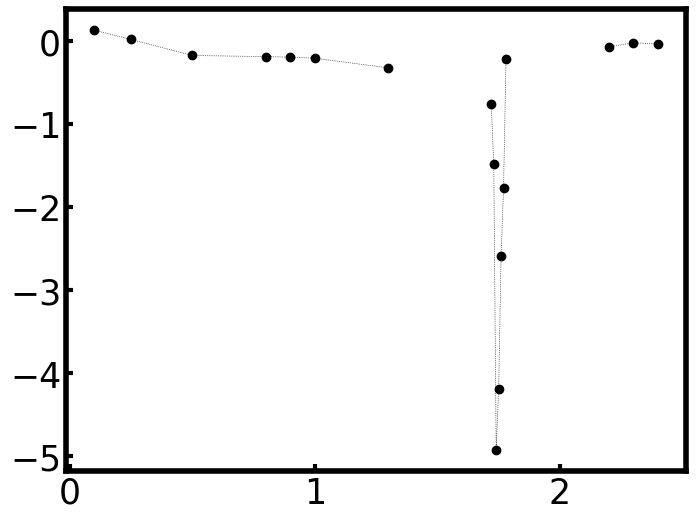

In [11]:
plt.plot(T_list, dSdT, marker = 'o', ls = ':', lw = 0.5, c = 'k')

In [12]:
T_star = (T_list - T_list[-13]) / T_list[-13]

In [13]:
T_list[-13]

1.74

In [14]:
T_fit_list = np.concatenate((T_star[8:13], T_star[14:20]))
S_fit_list = np.concatenate((S_list[8:13], S_list[14:20]))

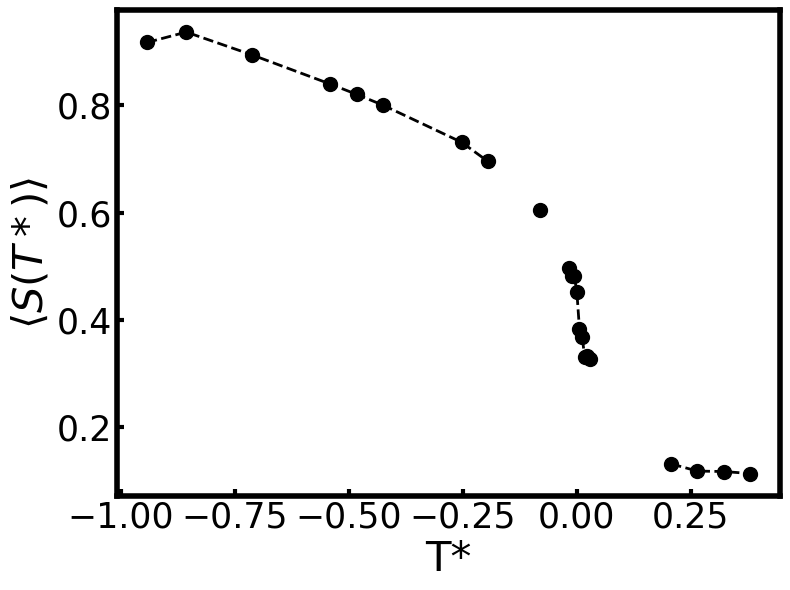

In [15]:
plt.plot(T_star, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [18]:
# load TM results
tm = np.load('nstep_100_bs_512_lr_0.01_samples_redo_short.npy')

In [19]:
T_tm = (np.arange(1.7, 1.8, 0.01) - 1.74) / 1.74

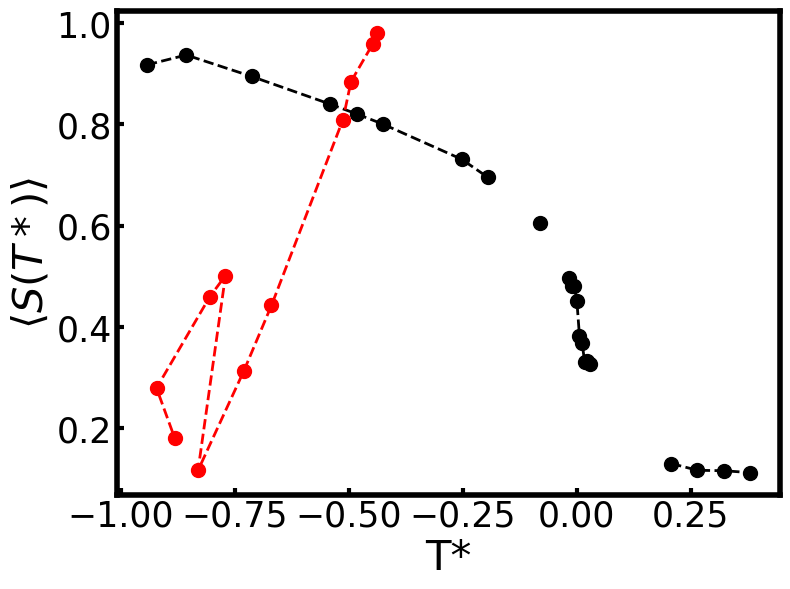

In [20]:
plt.plot(T_star, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.plot((tm[:,0] - 1.74) / 1.74, tm[:,1], marker = 'o', lw = 2, ls = '--', c = 'r', markersize = 10)

plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [21]:
# fit

tm_params0, tm_params_covar0 = optimize.curve_fit(fit_power, (tm[:3,0] - 1.73) / 1.73, tm[:3,1])
print(tm_params0, np.sqrt(np.diag(tm_params_covar0)))

tm_params1, tm_params_covar1 = optimize.curve_fit(fit_power, (tm[4:,0] - 1.73) / 1.73, tm[4:,1])
print(tm_params1, np.sqrt(np.diag(tm_params_covar1)))

[ 0.49189755 -0.8267606 ] [0.0197695  0.05087397]
[ 0.19964284 -2.08274527] [0.08540656 1.46567807]


In [23]:
T_list = [0.2, 0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]
mean_S = np.zeros(len(T_list))
std_S = np.zeros(len(T_list))
var_S  = np.zeros(len(T_list))
log_mean_S = np.zeros(len(T_list))
log_std_S = np.zeros(len(T_list))
log_var_std_S = np.zeros(len(T_list))
S_sample_list = []

boxl = 2.1257859853235995e+01 - 1.1233261982052916e+01
V = boxl * boxl * boxl
for i, temperature in enumerate(T_list):

    S = np.load('thermomaps-gayberne/%sT/S.npy' % temperature)
    S_sample_list.append(S)
    mean_S[i] = S.mean()
    std_S[i] = S.std()
    var_S[i] = S.var() / (temperature * V)

    n = len(S)
    log_mean_S[i] = np.log(S).mean()
    log_std_S[i] = S.std() * abs(1 / S.mean())
    log_var_std_S[i] = np.sqrt((np.mean(S**4) / (n)) - ((np.mean(S**2)**2 * (n - 3)) /(n * (n - 1)))) / (temperature * V)
S_sample_list = np.array(S_sample_list)

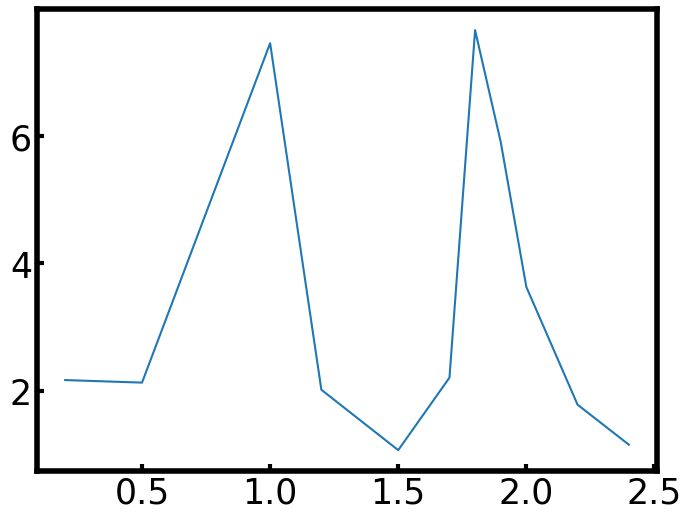

In [25]:
plt.plot(T_list, var_S * 1e6)

In [26]:
dS = np.zeros_like(S_sample_list)
dSdT_md = np.zeros_like(S_sample_list)
for i in range(S_sample_list.shape[0]):
    print(i)
    if (i == 0):
        dS[i,:] = S_sample_list[i + 1,:] - S_sample_list[i,:]
        dSdT_md[i,:] = (S_sample_list[i + 1,:] - S_sample_list[i,:]) / (T_list[i+1] - T_list[i])
    elif (i == S_sample_list.shape[0] - 1):
        dS[i,:] = S_sample_list[-1,:] - S_sample_list[-2,:]
        dSdT_md[i,:] = (S_sample_list[-1,:] - S_sample_list[-2,:]) / (T_list[-2] - T_list[-1])
    else:
        dS[i,:] = (S_sample_list[i + 1,:] - S_sample_list[i - 1,:]) / 2
        dSdT_md[i,:] = (S_sample_list[i + 1,:] - S_sample_list[i - 1,:]) / 2 / (T_list[i+1] - T_list[i-1])

ddS = dS.std(1)

0
1
2
3
4
5
6
7
8
9
10


In [27]:
dSdT = np.gradient(mean_S, T_list)

In [28]:
dSdT = np.gradient(mean_S, T_list)
ddSdT = abs(dSdT) * abs(ddS / np.mean(dS, axis = 1))
md_ddSdT = dSdT_md.std(1)

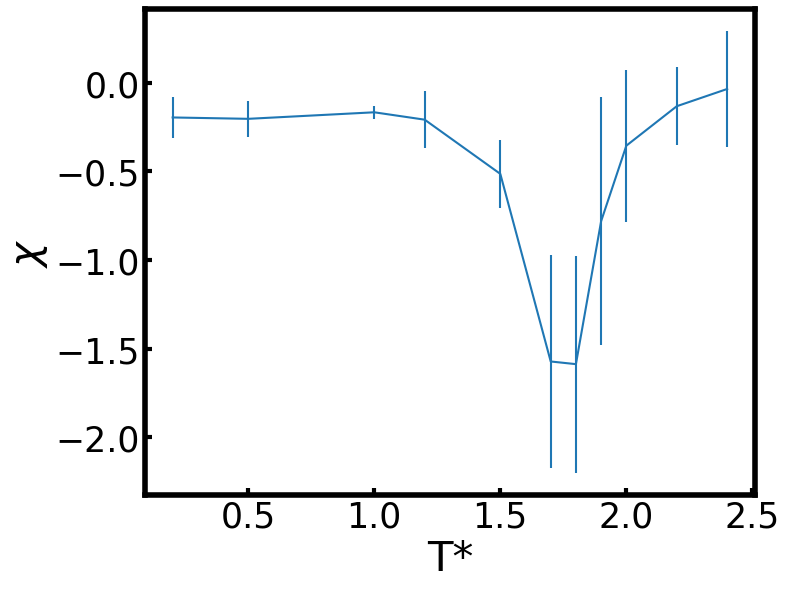

In [29]:
plt.errorbar(T_list, dSdT, yerr = ddSdT)
plt.ylabel(r'$\chi$')
plt.xlabel('T*')
plt.tight_layout()
plt.show()
plt.close()

In [30]:
T_star = np.concatenate([np.log((1.74 - np.array(T_list)[:6])), np.log((np.array(T_list)[6:] - 1.74))])
log_T_star = np.log(abs(T_star))

In [31]:
tm_samples = np.load('nstep_100_bs_512_lr_0.01_samples_redo_short.npy')[:,::10]

In [32]:
mean_tm_S = tm_samples.mean(1)
std_tm_S = tm_samples.std(1)

mean_tm_log_S = np.log(tm_samples).mean(1)
std_tm_log_S = tm_samples.std(1) * abs(1 / tm_samples.mean(1))

In [33]:
# susceptibility from TM

dS_TM = np.zeros_like(tm_samples)
tm_dSdT = np.zeros_like(tm_samples)
for i in range(tm_samples.shape[0]):
    print(i)
    if (i == 0):
        dS_TM[i,:] = tm_samples[i + 1,:] - tm_samples[i,:]
        tm_dSdT[i,:] = (tm_samples[i + 1,:] - tm_samples[i,:]) / (T_list[i + 1] - T_list[i])
    elif (i == tm_samples.shape[0] - 1):
        dS_TM[i,:] = tm_samples[-1,:] - tm_samples[-2,:] 
        tm_dSdT[i,:] = tm_samples[-1,:] - tm_samples[-2,:] / (T_list[-1] - T_list[-2])
    else:
        dS_TM[i,:] = (tm_samples[i + 1,:] - tm_samples[i - 1,:]) / 2 
        tm_dSdT[i,:] = (tm_samples[i + 1,:] - tm_samples[i - 1,:]) / 2 / ((T_list[i + 1] - T_list[i - 1]))

ddS_TM = dS_TM.std(1)

0
1
2
3
4
5
6
7
8
9
10


In [34]:
dSdT_tm = np.gradient(mean_tm_S, T_list)
ddSdT_tm = abs(dSdT_tm) * abs(ddS_TM / np.mean(dS_TM, axis = 1))
tm_ddSdT = tm_dSdT.std(1)

In [35]:
# susceptibility from TM

tm_chi = np.zeros_like(tm_samples)
md_chi = np.zeros_like(S_sample_list)
for i in range(tm_samples.shape[0]):
    print(i)
    tm_chi[i,:] = (tm_samples[i,:]**2) / T_list[i]
    md_chi[i,:] = (S_sample_list[i,:]**2) / T_list[i]

dtm_chi = tm_chi.std(1)
dmd_chi = md_chi.std(1)

0
1
2
3
4
5
6
7
8
9
10


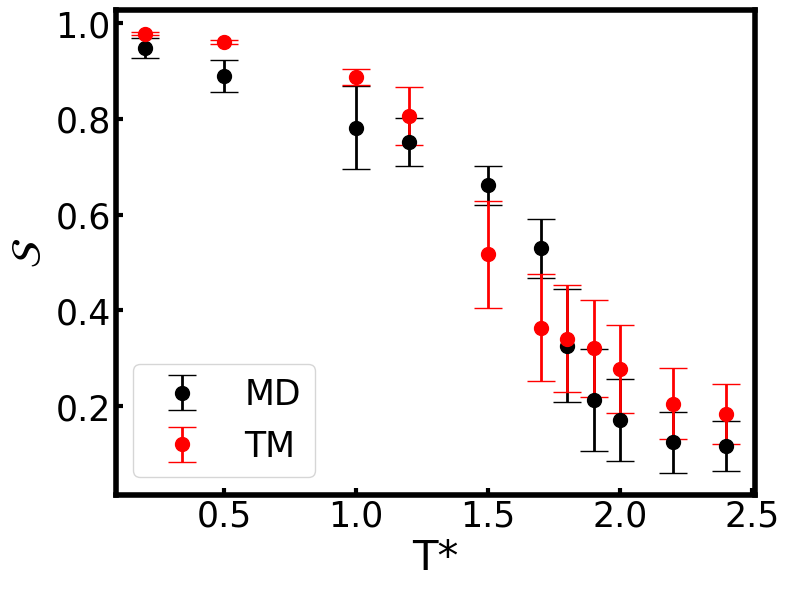

In [36]:
plt.errorbar(T_list, mean_S, yerr = std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, mean_tm_S, yerr = std_tm_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.xlabel(r'T*')
plt.ylabel(r'$\mathcal{S}$')
plt.legend(loc = 'lower left')
plt.tight_layout()
#plt.savefig('S_TM_MD.pdf', dpi = 300)
plt.show()
plt.close()

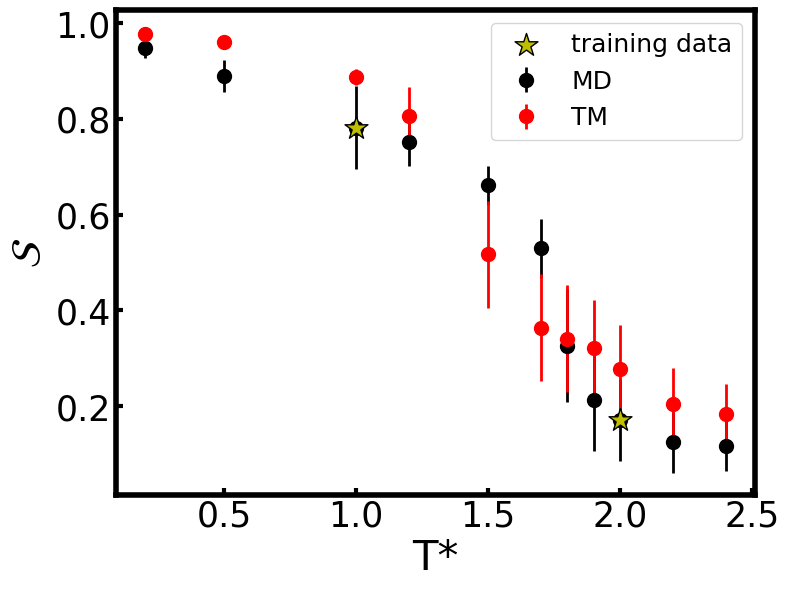

In [40]:
plt.errorbar(T_list, mean_S, yerr = std_S, marker = 'o', capsize = 0, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, mean_tm_S, yerr = std_tm_S, marker = 'o', capsize = 0, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel('$\mathcal{S}$')
plt.tick_params()
plt.tight_layout()
plt.savefig('S_TM_MD_stars_nocap.pdf', dpi = 300)
plt.show()
plt.close()

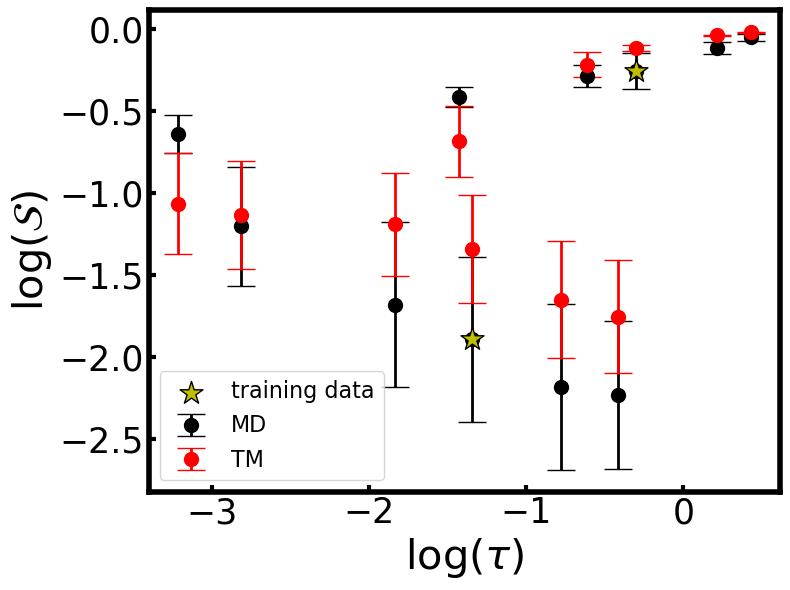

In [67]:
plt.errorbar(T_star, log_mean_S, yerr = log_std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_S, yerr = std_tm_log_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\mathcal{S}$)')
plt.tight_layout()
plt.savefig('magnetization_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [49]:
top_branch = T_star[:6]
bottom_branch = T_star[5:]

In [50]:
from scipy import optimize

In [51]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, log_mean_S[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, mean_tm_log_S[:6])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, log_mean_S[5:])
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_tm_log_S[5:])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[ 0.15564697 -0.16844086] [0.01329363 0.01964348]
[ 0.30870513 -0.10645696] [0.03131457 0.0462723 ]

[-0.54179237 -2.5806327 ] [0.0591558  0.11886502]
[-0.2408812  -1.77609206] [0.04413983 0.0886926 ]


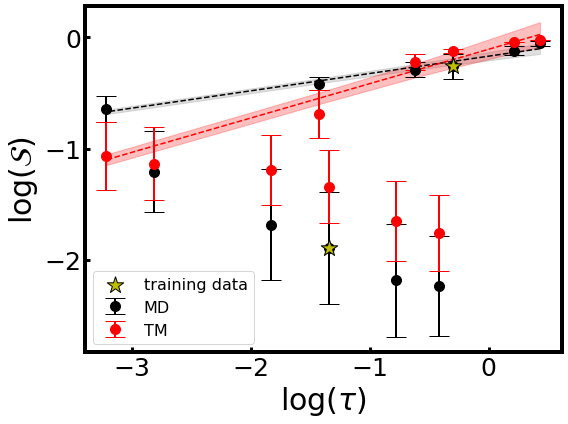

In [262]:
plt.errorbar(T_star, log_mean_S, yerr = log_std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_S, yerr = std_tm_log_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\mathcal{S}$)')
plt.tight_layout()
plt.savefig('magnetization_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

In [263]:
top_branch = ((np.array(T_list) - 1.74) / 1.74)[:6]
bottom_branch = ((np.array(T_list) - 1.74) / 1.74)[5:]

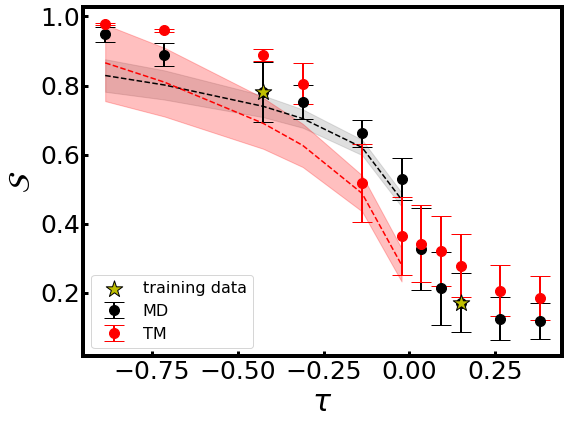

In [278]:
plt.errorbar(((np.array(T_list) - 1.74) / 1.74), mean_S, yerr = std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(((np.array(T_list) - 1.74) / 1.74), mean_tm_S, yerr = std_tm_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, (abs(top_branch)**(top_md_params[0])) * np.exp(top_md_params[1]) - df_md_top[5:],
                 (abs(top_branch)**(top_md_params[0])) * np.exp(top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, (abs(top_branch)**(top_md_params[0])) * np.exp(top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, (abs(top_branch)**(top_tm_params[0])) * np.exp(top_tm_params[1]) - df_tm_top[5:],
                 (abs(top_branch)**(top_tm_params[0])) * np.exp(top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, (abs(top_branch)**(top_tm_params[0])) * np.exp(top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(((np.array(T_list) - 1.74) / 1.74)[2], mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(((np.array(T_list) - 1.74) / 1.74)[-3], mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\mathcal{S}$')
plt.tight_layout()
#plt.savefig('magnetization_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

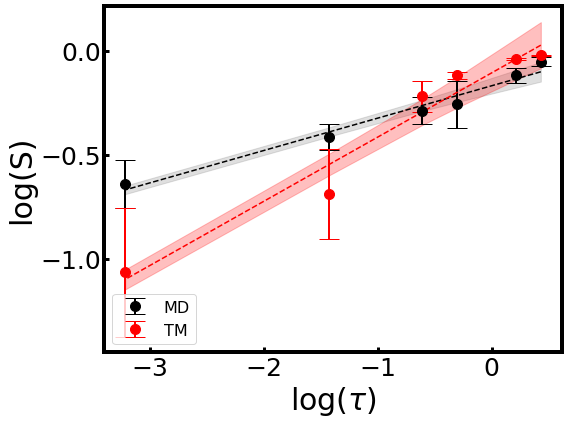

In [130]:
plt.errorbar(T_star[:6], log_mean_S[:6], yerr = log_std_S[:6], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star[:6], mean_tm_log_S[:6], yerr = std_tm_log_S[:6], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
#plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
#plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
#           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\mathcal{S}$)')
plt.tight_layout()
plt.savefig('magnetization_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

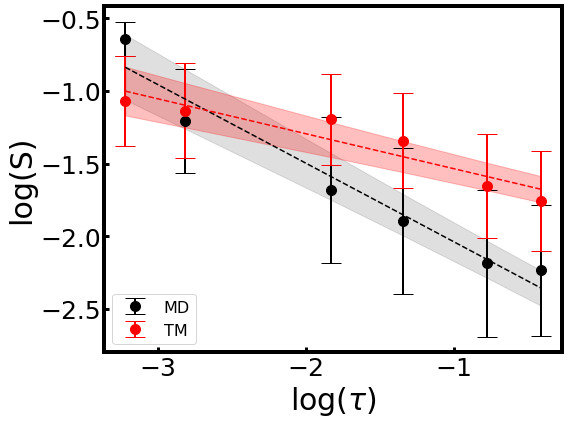

In [165]:
plt.errorbar(T_star[5:], log_mean_S[5:], yerr = log_std_S[5:], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star[5:], mean_tm_log_S[5:], yerr = std_tm_log_S[5:], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

#plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
#                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
#                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
#plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
#plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
#           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(S)')
plt.tight_layout()
#plt.savefig('magnetization_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

In [132]:
# draw ~100 samples from each temperature value and fit the trendlines individually to each
# to determine the error

nsamples = 10
tm_random_samples = np.zeros((tm_samples.shape[0], nsamples))
md_random_samples = np.zeros((tm_samples.shape[0], nsamples))
for i in range(tm_samples.shape[0]):
    tm_random_samples[i,:] = np.random.choice(tm_samples[i,:], size = nsamples)
    S = np.load('thermomaps-gayberne/%sT/S.npy' % temperature)
    md_random_samples[i,:] = np.random.choice(S, size = nsamples)

In [70]:
top_tm_exponents = []
top_md_exponents = []
bottom_tm_exponents = []
bottom_md_exponents = []
for i in range(nsamples):
    top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, np.log(md_random_samples[:6,i]))
    print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))
    top_md_exponents.append(top_md_params[0])

    top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, np.log(tm_random_samples[:6,i]))
    print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))
    top_tm_exponents.append(top_tm_params[0])

    bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, np.log(md_random_samples[5:,i]))
    print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))
    bottom_md_exponents.append(bottom_md_params[0])
    
    bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, np.log(tm_random_samples[5:,i]))
    print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))
    bottom_tm_exponents.append(bottom_tm_params[0])
    print('')

top_md_exponents = np.array(top_md_exponents)
top_tm_exponents = np.array(top_tm_exponents)
bottom_md_exponents = np.array(bottom_md_exponents)
bottom_tm_exponents = np.array(bottom_tm_exponents)

NameError: name 'nsamples' is not defined

In [71]:
print(np.mean(top_md_exponents),'+/-', 2 * np.std(top_md_exponents) / np.sqrt(nsamples))
print(np.mean(top_tm_exponents),'+/-', 2 * np.std(top_tm_exponents) / np.sqrt(nsamples))

print(np.mean(bottom_md_exponents),'+/-', 2 * np.std(bottom_md_exponents) / np.sqrt(nsamples))
print(np.mean(bottom_tm_exponents),'+/-', 2 * np.std(bottom_tm_exponents) / np.sqrt(nsamples))

/home/ebeyerle/anaconda3/envs/hoomd/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ebeyerle/anaconda3/envs/hoomd/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ebeyerle/anaconda3/envs/hoomd/lib/python3.11/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ebeyerle/anaconda3/envs/hoomd/lib/python3.11/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/ebeyerle/anaconda3/envs/hoomd/lib/python3.11/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'nsamples' is not defined

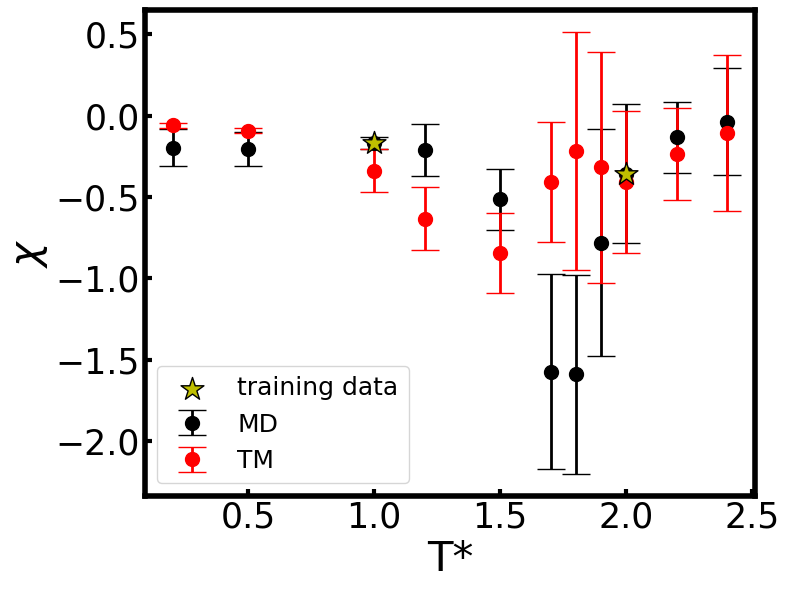

In [72]:
plt.errorbar(T_list, dSdT, yerr = ddSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, dSdT_tm, yerr = ddSdT_tm, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
plt.tight_layout()
#plt.savefig('chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

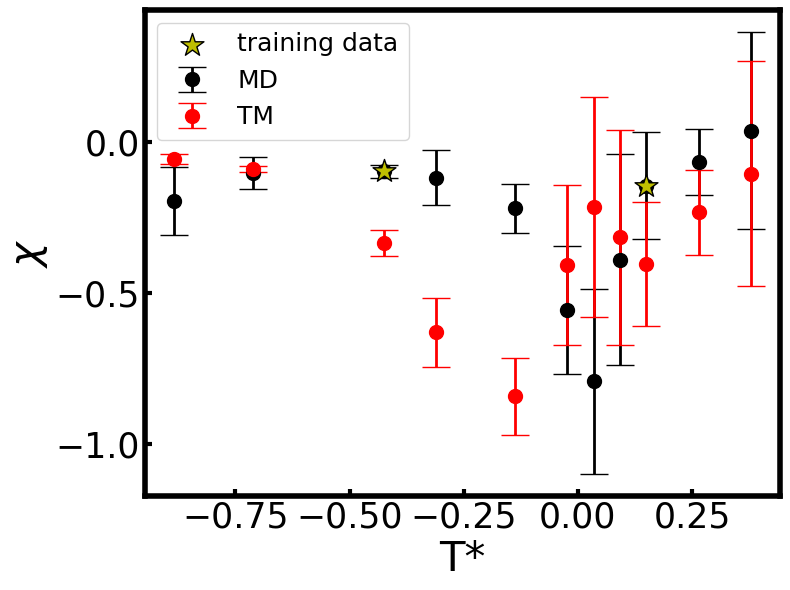

In [73]:
plt.errorbar((np.array(T_list) - 1.74) / 1.74, dSdT_md.mean(1), yerr = md_ddSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar((np.array(T_list) - 1.74) / 1.74, dSdT_tm, yerr = tm_ddSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter((T_list[2] - 1.74) / 1.74, dSdT_md.mean(1)[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter((T_list[-3] - 1.74) / 1.74, dSdT_md.mean(1)[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
plt.tight_layout()
#plt.savefig('chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

In [74]:
top_branch = ((np.array(T_list) - 1.74) / 1.74)[:6]
bottom_branch = ((np.array(T_list) - 1.74) / 1.74)[5:]

In [85]:
top_md_params, top_md_params_cov = optimize.curve_fit(fit_power, abs(top_branch), dSdT_md.mean(1)[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(fit_power, abs(top_branch[:-1]), dSdT_tm[:5])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(fit_power, abs(bottom_branch[:]), dSdT_md.mean(1)[5:][::-1],
                                                           maxfev = 1000)
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(fit_power, abs(bottom_branch[:]), dSdT_tm[5:][::-1])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

print('')
print('averages:')
print('')

print((top_md_params + bottom_md_params) / 2., np.diag(np.sqrt(top_md_params_cov**2 + bottom_md_params_cov**2)))
print((top_tm_params + bottom_tm_params) / 2., np.diag(np.sqrt(top_tm_params_cov**2 + bottom_tm_params_cov**2)))


# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[-0.08988433 -0.48013425] [0.02282416 0.07701715]
[-0.15172195 -0.89687696] [0.06776445 0.25833575]

[-1.56065183  0.79519221] [0.73882297 0.33858526]
[-0.45607551  0.22056082] [0.15596772 0.16438608]

averages:

[-0.82526808  0.15752898] [0.54585963 0.11479333]
[-0.30389873 -0.33815807] [0.02475556 0.07200073]


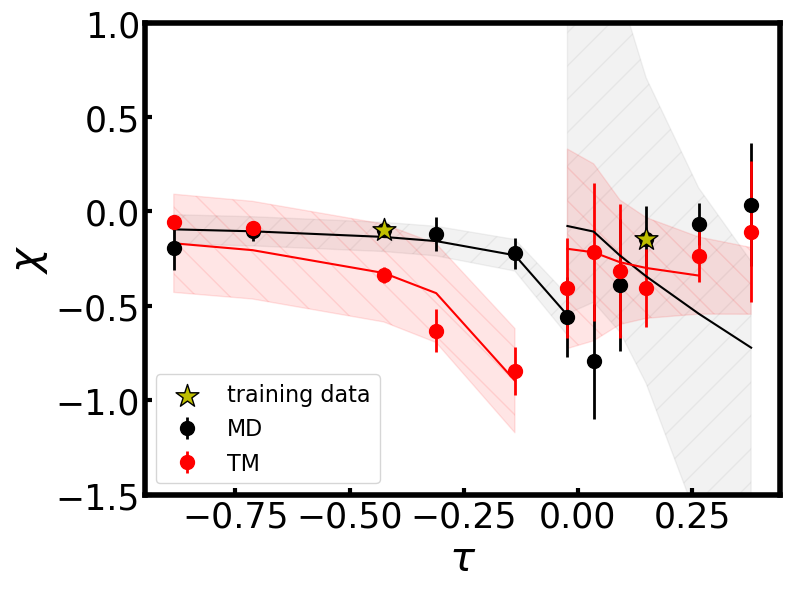

In [88]:
plt.errorbar((np.array(T_list) - 1.74) / 1.74, dSdT_md.mean(1), yerr = md_ddSdT, marker = 'o', capsize = 0, 
             markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True, label = 'MD')
plt.errorbar((np.array(T_list) - 1.74) / 1.74, dSdT_tm, yerr = tm_ddSdT, marker = 'o', capsize = 0, 
             markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True, label = 'TM')
plt.scatter((T_list[2] - 1.74) / 1.74, dSdT_md.mean(1)[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter((T_list[-3] - 1.74) / 1.74, dSdT_md.mean(1)[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.plot(top_branch, fit_power(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '-')
plt.fill_between(top_branch, fit_power(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[:6],
                 fit_power(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[:6], color = 'grey',
                alpha = 0.1, hatch = '/')
plt.plot(top_branch[:-1], fit_power(top_branch[:-1], top_tm_params[0], top_tm_params[1]), color = 'r', ls = '-')
plt.fill_between(top_branch[:-1], fit_power(top_branch[:-1], top_tm_params[0], top_tm_params[1]) - df_tm_top[:5],
                 fit_power(top_branch[:-1], top_tm_params[0], top_tm_params[1]) + df_tm_top[:5], color = 'r',
                alpha = 0.1, hatch = '\\')

plt.plot(bottom_branch, fit_power(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '-')
plt.fill_between(bottom_branch, fit_power(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[:6],
                 fit_power(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
                alpha = 0.1, hatch = '/')
plt.plot(bottom_branch[:-1], fit_power(bottom_branch[:-1], bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '-')
plt.fill_between(bottom_branch[:], fit_power(bottom_branch[:], bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
                 fit_power(bottom_branch[:], bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
                alpha = 0.1, hatch = '\\')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi$')
plt.ylim((-1.5, 1.0))
plt.tight_layout()
#plt.savefig('susceptibility_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [138]:
# log-log plot for scaling law

mean_md_log_dSdT = np.log(abs(dSdT_md), where = dSdT_md != 0).mean(1)
std_md_log_dSdT = dSdT_md.std(1) * abs(1 / dSdT_md.mean(1))

mean_tm_log_dSdT = np.log(abs(tm_dSdT), where = tm_dSdT != 0).mean(1)
std_tm_log_dSdT = tm_dSdT.std(1) * abs(1 / tm_dSdT.mean(1))

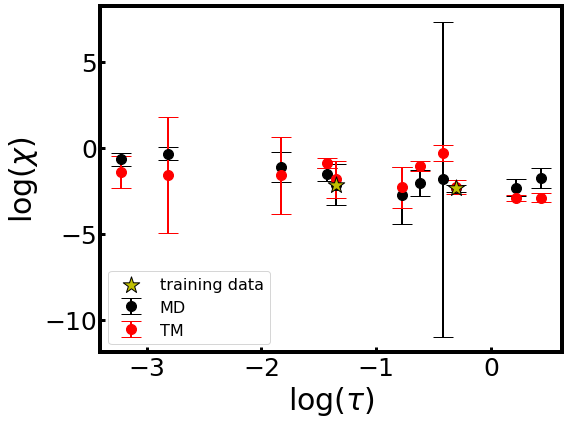

In [143]:
plt.errorbar(T_star, mean_md_log_dSdT, yerr = std_md_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_dSdT, yerr = std_tm_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.scatter(T_star[2], mean_md_log_dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('susceptibility_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [169]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, mean_md_log_dSdT[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, mean_tm_log_dSdT[:6])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_md_log_dSdT[5:])
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_tm_log_dSdT[5:])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

print('')
print('averages:')
print('')

print((top_md_params + bottom_md_params) / 2., np.diag(np.sqrt(top_md_params_cov**2 + bottom_md_params_cov**2)))
print((top_tm_params + bottom_tm_params) / 2., np.diag(np.sqrt(top_tm_params_cov**2 + bottom_tm_params_cov**2)))


# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[-0.40264836 -2.10062222] [0.1168548 0.1726717]
[-0.45320235 -2.26184131] [0.25097126 0.37085028]

[-0.71005276 -2.7009929 ] [0.21414237 0.43028813]
[ 0.10268236 -1.31514333] [0.2946665  0.59208972]

averages:

[-0.55635056 -2.40080756] [0.04784685 0.18753319]
[-0.17526    -1.78849232] [0.10726822 0.37658196]


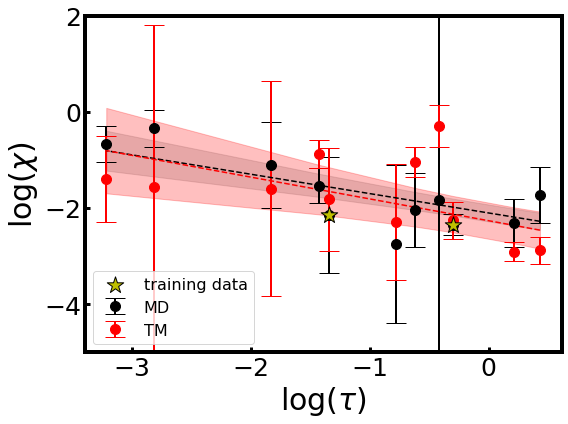

In [175]:
plt.errorbar(T_star, mean_md_log_dSdT, yerr = std_md_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_dSdT, yerr = std_tm_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[:6],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[:6], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[:6],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[:6], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(T_star[2], mean_md_log_dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.ylim((-5, 2))
plt.tight_layout()
plt.savefig('susceptibility_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

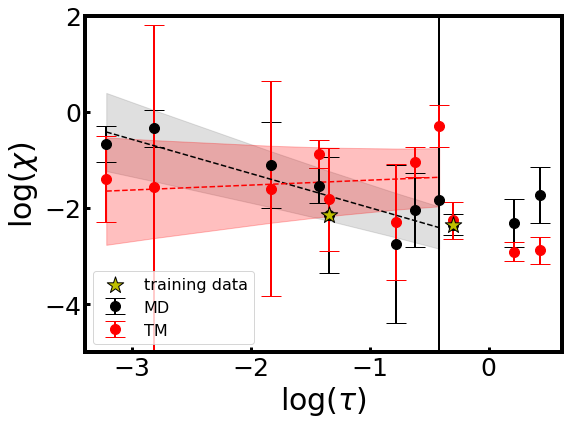

In [152]:
plt.errorbar(T_star, mean_md_log_dSdT, yerr = std_md_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_dSdT, yerr = std_tm_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

#plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
#                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
#                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(T_star[2], mean_md_log_dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.ylim((-5, 2))
plt.tight_layout()
plt.savefig('susceptibility_tm_md_comparison_bottom_fit.pdf', dpi = 300)
plt.show()
plt.close()

In [146]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, T_star, mean_md_log_dSdT)
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, T_star, mean_tm_log_dSdT)
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))


# fit errors when plotting


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[-0.50204001 -2.25906099] [0.12953951 0.20281698]
[-0.28836697 -2.03611769] [0.213573   0.33438624]


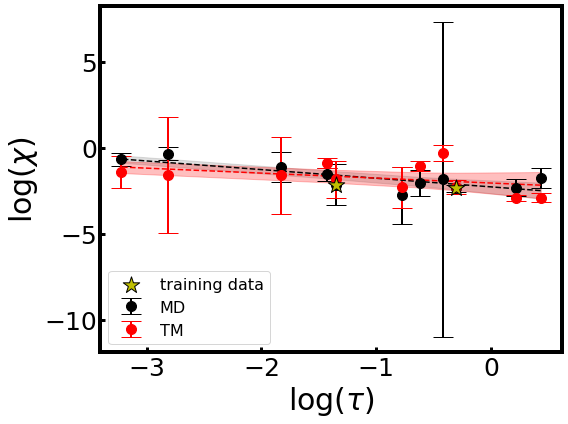

In [147]:
plt.errorbar(T_star, mean_md_log_dSdT, yerr = std_md_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_dSdT, yerr = std_tm_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(T_star[2], mean_md_log_dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('susceptibility_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

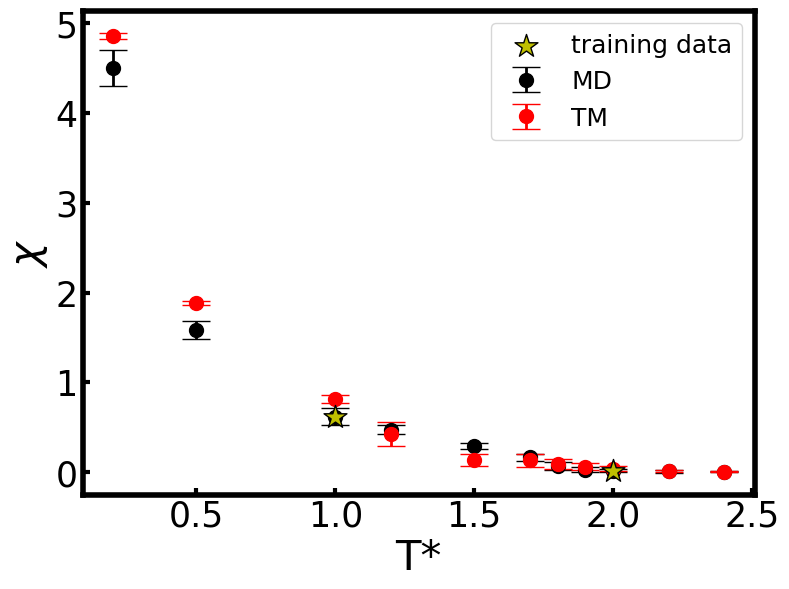

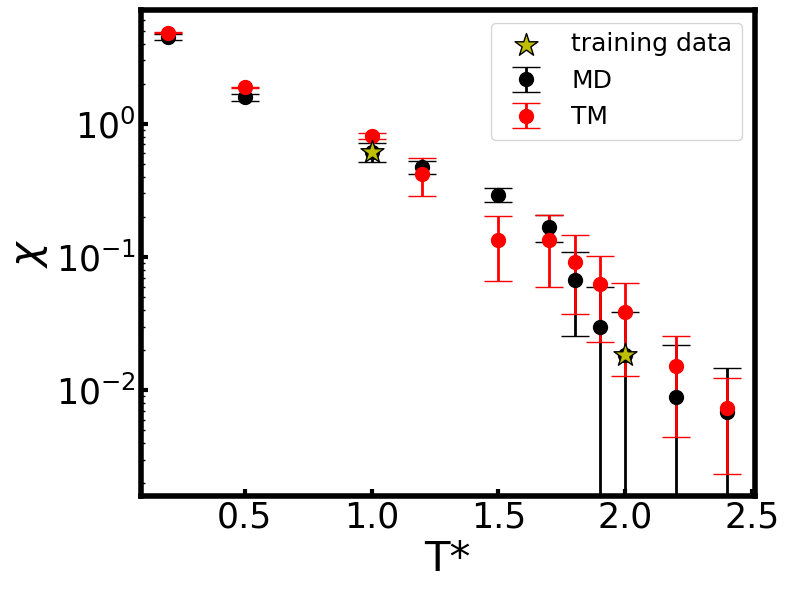

In [90]:
plt.errorbar(T_list, md_chi.mean(1), yerr = dmd_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, tm_chi.mean(1), yerr = dtm_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], md_chi.mean(1)[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], md_chi.mean(1)[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
#plt.yscale('log')
plt.tight_layout()
plt.savefig('chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

plt.errorbar(T_list, md_chi.mean(1), yerr = dmd_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, tm_chi.mean(1), yerr = dtm_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], md_chi.mean(1)[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], md_chi.mean(1)[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
plt.yscale('log')
plt.tight_layout()
plt.savefig('lin-log_chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

In [25]:
# log-log plot for scaling law

mean_md_log_chi = np.log(md_chi, where = md_chi != 0).mean(1)
std_md_log_chi = md_chi.std(1) * abs(1 / md_chi.mean(1))

mean_tm_log_chi = np.log(tm_chi, where = tm_chi != 0).mean(1)
std_tm_log_chi = tm_chi.std(1) * abs(1 / tm_chi.mean(1))

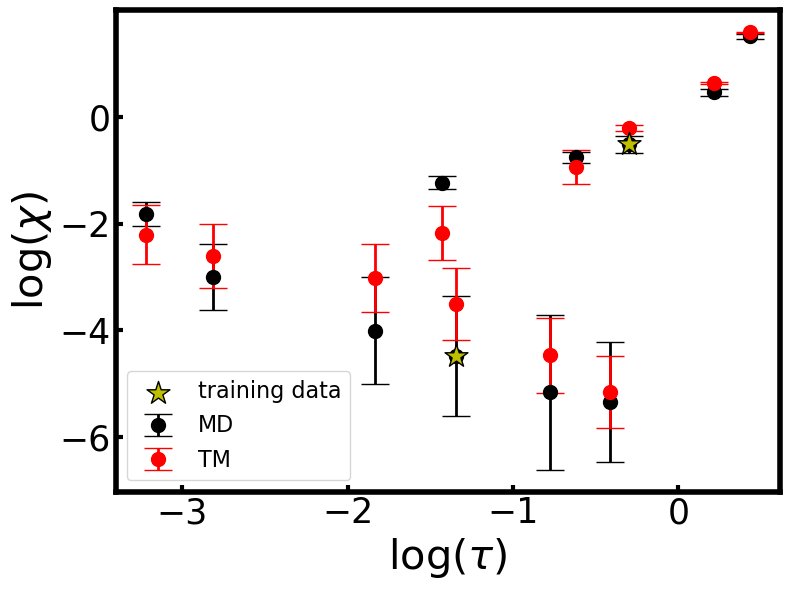

In [145]:
plt.errorbar(T_star, mean_md_log_chi, yerr = std_md_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_chi, yerr = std_tm_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.scatter(T_star[2], mean_md_log_chi[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_chi[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('chi_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [26]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, mean_md_log_chi[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, mean_tm_log_chi[:6])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_md_log_chi[5:])
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_tm_log_chi[5:])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[0.77570845 0.24102042] [0.21907776 0.32372253]
[0.98737179 0.25605273] [0.27524776 0.40672271]

[-1.19543563 -6.04143825] [0.11311208 0.22728237]
[-0.97610575 -5.1860426 ] [0.13916456 0.27963106]


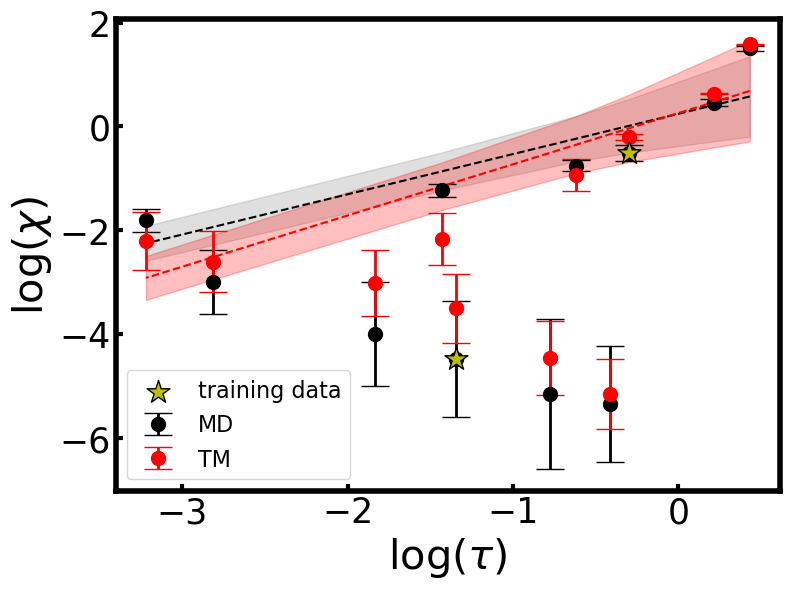

In [28]:
plt.errorbar(T_star, mean_md_log_chi, yerr = std_md_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_chi, yerr = std_tm_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')

#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.scatter(T_star[2], mean_md_log_chi[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_chi[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('chi_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

In [47]:
points = np.load('short_critical_nstep_100_bs_512_lr_0.01.npy')

In [48]:
points

array([[1.5       , 0.51880089, 0.10988877],
       [1.55      , 0.45789146, 0.11388128],
       [1.6       , 0.42321858, 0.11095634],
       [1.65      , 0.39492039, 0.11143384],
       [1.7       , 0.36499667, 0.11121869],
       [1.73      , 0.35989123, 0.10867213],
       [1.76      , 0.34182261, 0.11042373],
       [1.8       , 0.33185978, 0.10843797],
       [1.85      , 0.33830757, 0.1052801 ],
       [1.9       , 0.31516975, 0.10055378],
       [1.95      , 0.30276214, 0.09684535],
       [2.        , 0.27679048, 0.09275147]])

In [49]:
points_md = np.copy(points)
for m, i in enumerate(points[:,0]):
    tmp = np.load('../T_%s_rho_0.35/S.npy' % np.round(i, 2))
    points_md[m,1] = np.mean(tmp)
    points_md[m,2] = np.std(tmp)

In [50]:
points_md

array([[1.5       , 0.65519712, 0.04288772],
       [1.55      , 0.62976303, 0.04905476],
       [1.6       , 0.60581475, 0.05219571],
       [1.65      , 0.55326982, 0.08440235],
       [1.7       , 0.48762679, 0.10960976],
       [1.73      , 0.48568938, 0.07229489],
       [1.76      , 0.36785196, 0.13948945],
       [1.8       , 0.30307608, 0.1308847 ],
       [1.85      , 0.21960833, 0.11009257],
       [1.9       , 0.1923947 , 0.0882288 ],
       [1.95      , 0.17850285, 0.08234424],
       [2.        , 0.15669578, 0.06874425]])

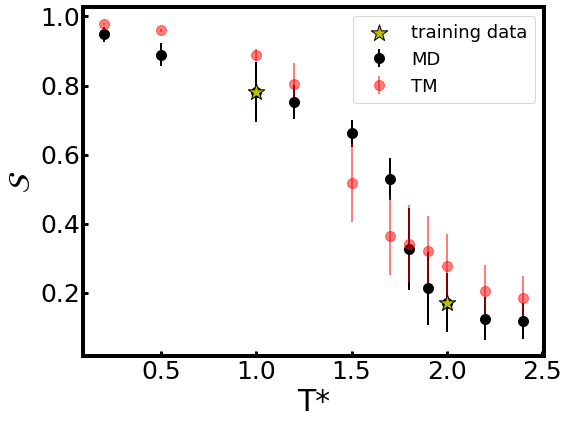

In [296]:
plt.errorbar(T_list, mean_S, yerr = std_S, marker = 'o', capsize = 0, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, mean_tm_S, yerr = std_tm_S, marker = 'o', capsize = 0, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM', alpha = 0.5)
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel('$\mathcal{S}$')
plt.tick_params()
plt.tight_layout()
plt.savefig('S_TM_MD_stars_no_cap.pdf', dpi = 300)
plt.show()
plt.close()

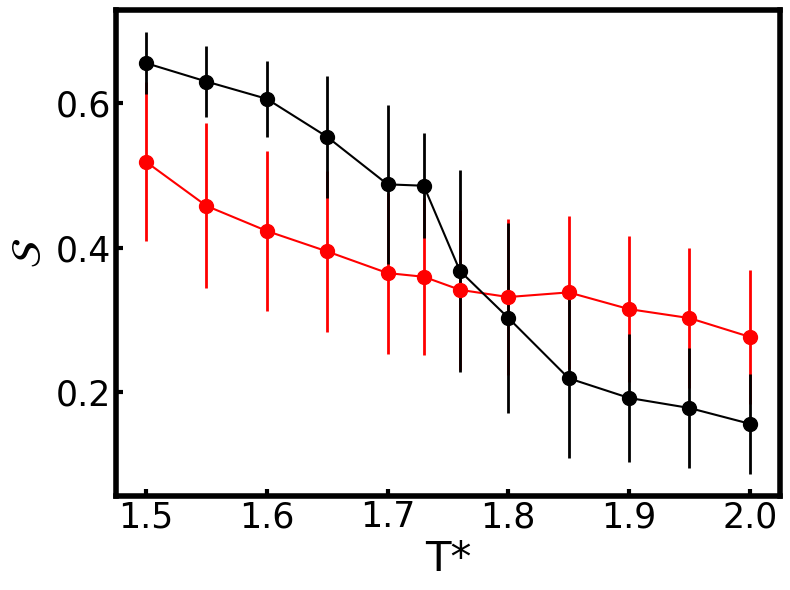

In [51]:
plt.errorbar(points[:,0], points[:,1], yerr = points[:,2], capthick = True, elinewidth = 2, marker = 'o',
            markersize = 10, color = 'r')
plt.errorbar(points_md[:,0], points_md[:,1], yerr = points_md[:,2], capthick = True, elinewidth = 2, marker = 'o',
            markersize = 10, color = 'k')
#plt.errorbar(T_list, mean_S, yerr = std_S, capthick = True, elinewidth = 2, marker = 'o',
#            color = 'k', markersize = 10)
plt.xlabel('T*')
plt.ylabel('$\mathcal{S}$')
plt.tick_params()
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
# fit (1.5 --> 1.7 and 1.85 --> 2.0)

